# Part 4: Extra Credit

## Part 4: Choose your own advecnture! (7 Points; Optional for Extra Credit)

This section is open ended and your chance to explare any advanced analysis. Please perform any additional analysis you find interesting! Suggested analyses (only do one max):

- Topic evolution over time - see https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html#visualization 
- Word frequency over time - does the frequency of certain words change over time
- Semantic similarity - investigate similarity within and between presidents or time periods. For example, similarity between one presidents speeches, e.g. are all of Biden's speeches similar to each other? How similar are they to Trump's speeches? Are speeches from the 2000s more similar to each other than speeches in the 1800s? Which two presidents have the most similar speeches? See https://spacy.io/usage/linguistic-features#vectors-similarity 
-  Named Entity Recognition - which entity types are most common in speeches? What are the most common words for each entity type - see https://spacy.io/usage/linguistic-features#named-entities 
- Classification - can you build a classifier to detect democratic versus republican state of the union speeches from 1980-2024 - see https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py 


## Word Frequency Over Time

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter, defaultdict
import spacy

plt.style.use('seaborn-v0_8-dark')
sou = pd.read_csv("data/SOTU.csv")
sou["Year"] = sou["Year"].astype(int)
sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020,\nThe President. Thank you very much. Thank yo...,6169


## Analyze each speech once, then aggregate lemma frequencies by year.

In [ ]:
# load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Dictionaries to store lemma frequencies and total token count per year
year_lemma_counts = defaultdict(Counter)
year_total_tokens = defaultdict(int)

# Process each speech in the dataset
for _, row in sou.iterrows():
    year = int(row["Year"])
    text = row["Text"]
    doc = nlp(text)
    
    for token in doc:
        if token.is_stop or token.is_punct or token.is_space:
            continue
        lemma = token.lemma_.lower()
        year_lemma_counts[year][lemma] += 1
        year_total_tokens[year] += 1

# show a example year 2023
year_example = 2023
year_lemma_counts[year_example].most_common(10)

## Construct a Table of Relative Frequency Changes Over Time for Target Words

In [9]:
target_lemmas = ["war", "job", "people"]

# Build a table of lemma counts and relative frequencies by year
rows = []
for year, lemma_counter in year_lemma_counts.items():
    total = year_total_tokens[year]
    if total == 0:
        continue
    for lemma in target_lemmas:
        count = lemma_counter.get(lemma, 0)
        rel_freq = count / total
        rows.append({"Year": year, "Lemma": lemma, "Count": count, "Relative_Frequency": rel_freq})

freq_df = pd.DataFrame(rows)

freq_df = freq_df.sort_values(["Lemma", "Year"])

freq_df.head()

## Plot the frequency changes of words over the entire time period

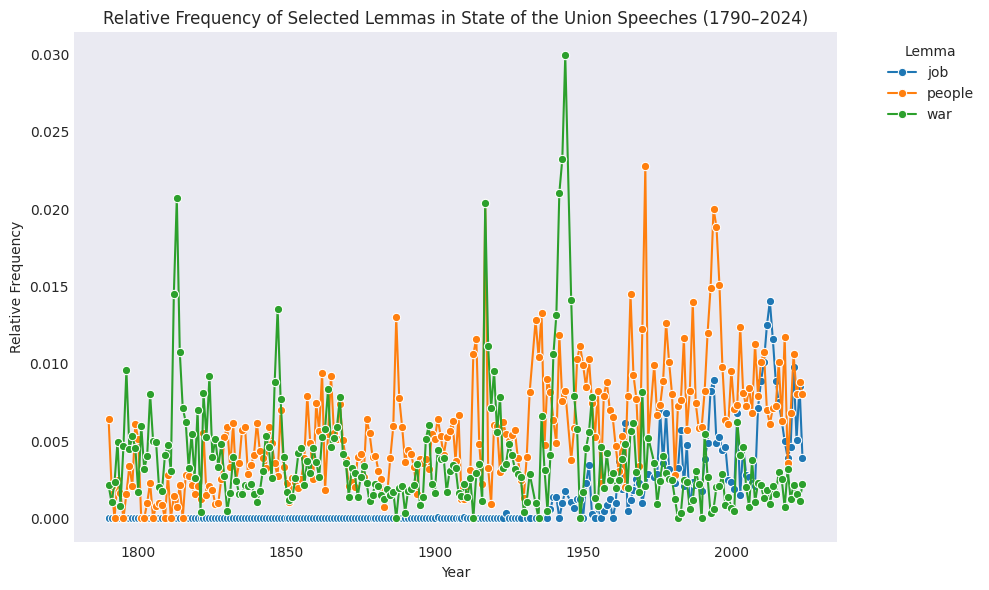

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=freq_df,
    x="Year",
    y="Relative_Frequency",
    hue="Lemma",
    marker="o"
)

plt.title("Relative Frequency of Selected Lemmas in State of the Union Speeches (1790–2024)")
plt.xlabel("Year")
plt.ylabel("Relative Frequency")
plt.legend(title="Lemma", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.savefig("outputs/word_frequency_over_time_full.png")
plt.show()